### Mounting your google drive on Colab Noetebook

In [1]:
from google.colab import drive
## esto te va a pedir autorización. 
# Entra al link. Dale los permisos. Copiate el passw y pegalo acá donde te lo pide
drive.mount('/content/drive')

In [2]:
## remplazá 'workshopml'
# por el nombre que le hayas puesto a esa carpeta en drive si usaste otro distinto
#%cd drive/My Drive/workshopml/ML_workshop2020/  
datapath = './data/clinvarHC_modeling.csv.gz'


In [3]:
%matplotlib inline

# data manipulation
import pandas as pd
import numpy as np

## learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

## preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


### model performance
from sklearn import metrics

#ploting modules
import matplotlib
from matplotlib import pyplot as plt
import seaborn



In [4]:
SEED = 2718281
data = pd.read_csv(datapath,sep = ',',index_col='ChrPosRefAlt',nrows = 500)
X,y = data.drop(['ClinvarHC'],axis = 1), data[['ClinvarHC']]
display(X.head())
display(y.head())
#y.columns = ['ChrPosRefAlt','ClinvarHC']
#y.set_index(['ChrPosRefAlt'],inplace = True) 

,gerp_gerp_nr,gerp_gerp_rs,linsight_value,phastcons_phastcons100_vert,phastcons_phastcons30_mamm,phylop_phylop100_vert,phylop_phylop100_vert_r,phylop_phylop30_mamm,segway_sum_score,segway_mean_score,...,intact_counts,gnomad_gene_oe_lof_min,gnomad_gene_oe_mis_min,gnomad_gene_oe_syn_min,gnomad_gene_lof_z_max,gnomad_gene_mis_z_max,gnomad_gene_syn_z_max,gnomad_gene_pLI_max,gnomad_gene_pRec_max,gnomad_gene_pNull_max
ChrPosRefAlt,,,,,,,,,,,,,,,,,,,,,
chr21-46306709-C-T,4.70,-0.589,NaN,0.990,0.971,2.374,0.43929,0.019,NaN,NaN,...,22.0,0.000000,0.87617,0.96747,NaN,0.96463,0.13453,NaN,NaN,NaN
chr4-104067195-T-C,4.84,-0.518,NaN,0.000,0.006,-0.832,0.04507,0.170,NaN,NaN,...,28.0,0.088125,0.52606,0.85277,8.4223,2.20930,0.63648,8.850800e-01,9.741200e-01,2.696400e-10
chrX-153297737-G-C,5.93,5.060,NaN,1.000,0.999,5.393,0.66025,0.245,NaN,NaN,...,24.0,0.000000,0.83348,1.33280,2.5441,0.24759,-8.06820,7.838600e-01,4.625100e-01,9.647300e-02
chr12-116429247-T-C,5.35,4.170,NaN,0.996,1.000,2.519,0.45206,1.138,NaN,NaN,...,16.0,0.000000,0.59238,0.94428,9.4346,4.06230,0.24178,1.000000e+00,3.926500e-17,2.125300e-41
chr17-10535216-T-C,4.91,1.220,NaN,0.045,0.057,1.768,0.38141,0.118,NaN,NaN,...,11.0,0.491950,0.82734,1.04760,4.7735,2.01000,-0.76659,2.880900e-20,1.000000e+00,4.476500e-08


,ClinvarHC
ChrPosRefAlt,
chr21-46306709-C-T,0
chr4-104067195-T-C,0
chrX-153297737-G-C,1
chr12-116429247-T-C,0
chr17-10535216-T-C,0


### Hacemos el split en training y tesing sets. 

In [5]:
# Prueben con esta
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
#display(y.ClinvarHC.value_counts(normalize = True)[1]),
#display(y_train.ClinvarHC.value_counts(normalize = True)[1]), 
#y_test.ClinvarHC.value_counts(normalize = True)[1]


# La forma correcta, para respetar la proporción de categorías:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=SEED,stratify = y)


### Podemos ya entrenar el primer modelo? 
* Falla, por qué?

In [6]:
#LR = LogisticRegression(random_state=0).fit(X_train, y_train) # est va a romperse...

### Básiscamente tenemos 2 grandes problemas
* 1) Los Features categóricos no tienen un tratamiento numérico. Debemos binarizarlos. 
* 2) Lo Features continuos tienen Nulls, y una regresión Logística no puede lidiar con Nulls. 
* 3) Además es conveniente escalar las variables antes de correr una RL (aunque esto último no impide correr el modelo)

# Algunas notas antes de empezar

#### Por favor, no preprocecsar el Dataset en forma global antes de arrancar. 
* Lo van a ver a menudo, pero no es el camino correcto. 
* Puede traer problemas de generalización



### Lo correcto es trabajar con pipelines. 
* Los pipelines son una manera de integrar nuestro modelo. 

* Nuestro modelo no tenemos que pensarlo como, por ejemplo una "regresión logística", sobre datos ya preprocesados de antemano, sino que nos permite pensar al preprocesamiento, imputación, y otras transformaciones como parte del modelo mismo).



## Empezemos detectando las variables categóricas.

In [7]:
categorical_feature_mask = X_train.dtypes==object       # esto nos da un vector booleano 
categorical_columns = X_train.columns[categorical_feature_mask].tolist()  # acá picnhamos los nombres de esas columnas

numerical_columns = X_train.columns[~X_train.columns.isin(categorical_columns)] # defino las numéricas como el complemento de las categóricas 
print("tenemos %s variables numéricas"%len(numerical_columns))
print("tenemos %s variables categóricas"%len(categorical_columns))

categorical_columns

tenemos 33 variables numéricas
tenemos 6 variables categóricas


['interpro_domain_simple',
 'ess_gene_ess_gene',
 'ess_gene_ess_gene_crispr',
 'ess_gene_ess_gene_crispr2',
 'ess_gene_ess_gene_gene_trap',
 'exac_gene_exac_cnv_flag']

* Ojo, pues caundo vectorizemos las variables categóricas, tendremos una variable por cada una de sus categorías (-1 para evitar colinealidades)

In [8]:
print ('Número de Categorías por Variable')
X_train[categorical_columns].apply(lambda x: x.nunique())
# Esto nos dice que son 21 categorías


Número de Categorías por Variable


interpro_domain_simple         7
ess_gene_ess_gene              2
ess_gene_ess_gene_crispr       2
ess_gene_ess_gene_crispr2      3
ess_gene_ess_gene_gene_trap    4
exac_gene_exac_cnv_flag        2
dtype: int64

Porcentaje de filas Null por Variable


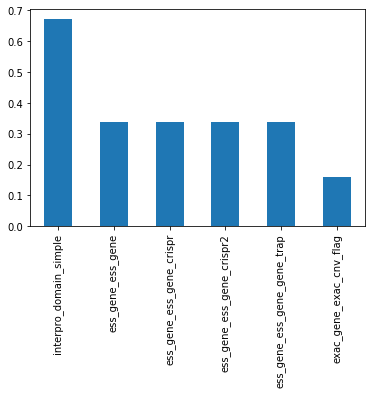

In [9]:
print ('Porcentaje de filas Null por Variable')
X_train[categorical_columns].apply(lambda x: x.isnull().sum()/len(x)).plot(kind = 'bar') 
# Y hay varios nulls o 'Missing categories' en cada variale

# Cuántas columnas esperan que se genere en la  binarización del dataset?

#### veamos

In [10]:
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])      
# Uno podría incluir drop='first' para evitar colinealidades, pero no si tenemos seteado handle_unknown = 'ignore'



## Qué  va a hacer este transformer? 
* 1) SimpleImputer:  imputamos el valor "missing", cuando hay un valor None.
* 2) OneHotEncoder:  transformamos esas variables categóricas a variables numéricas binarias, una por cada categoría presente en cada variable



In [11]:
# ejecutemos el 
Xtmp = X_train[categorical_columns]  # matrz temporal 
Xtmp_transformed = categorical_transformer.fit_transform(Xtmp)  ### Acá estamos aplicando la transformación.


feature_names = categorical_transformer.named_steps['onehot'].get_feature_names()
feature_names

array(['x0_Aromatic amino acid hydroxylase, C-terminal',
       'x0_EGF-like domain', 'x0_Fibronectin type III',
       'x0_Ion transport domain', 'x0_Myosin head, motor domain',
       'x0_Serine-threonine/tyrosine-protein kinase, catalytic domain',
       'x0_missing', 'x0_others', 'x1_E', 'x1_N', 'x1_missing', 'x2_E',
       'x2_N', 'x2_missing', 'x3_E', 'x3_N', 'x3_S', 'x3_missing', 'x4_E',
       'x4_H', 'x4_K', 'x4_N', 'x4_missing', 'x5_N', 'x5_Y', 'x5_missing'],
      dtype=object)

#### Sólo para visualizarlo y entenderlo mejor:
(y responder la pregunta de arriba)


In [12]:
aux = pd.DataFrame(Xtmp_transformed.toarray(),columns = feature_names).head()
print(aux.shape)
aux.head()

(5, 26)


,"x0_Aromatic amino acid hydroxylase, C-terminal",x0_EGF-like domain,x0_Fibronectin type III,x0_Ion transport domain,"x0_Myosin head, motor domain","x0_Serine-threonine/tyrosine-protein kinase, catalytic domain",x0_missing,x0_others,x1_E,x1_N,...,x3_S,x3_missing,x4_E,x4_H,x4_K,x4_N,x4_missing,x5_N,x5_Y,x5_missing
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


* Noten arriba, la presencia de columnas "Missing" en cada variable


#### Listo con el tratamiento básico en las variables categóricas. 


.

##   Vamos al tratamiento de las variables numéricas

## Vamos a tratarlas de la siguiente forma: 
* 1) Imputamos en cada valor None, la mediana a lo largo de todos los restantes elementos en ese feature.
* notar que es conveniente respecto a imputar el valor medio debido a que la mediana es robusta a outliers.

* 2) Standard Scaler  ($Z_{score}$):  Es una forma de normalizar una variable numérica:
    $x_{mean}$ : se calcula el valor medio de toda la variable
    $x_{sd}$ : se calcula el desvío estandard de toda la variable.
    Luego para cada x $\in$ variable se calcula:

$Z_{score} = \frac{x - x_{mean}}{x_{sd}}$


In [13]:
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))])  # Esto es una vacancia de Sklearn, no permite aún "centrar" matrizes sparse

#(pisamos el anterior, es solo para exp)
Xtmp_num = X_train[numerical_columns] 
Xtmp_num_transformed = numeric_transformer.fit_transform(Xtmp_num)
#### Acá no se puede recuperar el nombre de los features, pero por el tipo de transformación permanece inalterado.
    


* en realidad la transformación que hicimos fue:
$Z^{*} = \frac{x }{x_{sd}}$

In [14]:
dfXtmp_numeric_transformed = pd.DataFrame(Xtmp_num_transformed,columns=Xtmp_num.columns)
print(dfXtmp_numeric_transformed.shape)
dfXtmp_numeric_transformed.head()

(375, 33)


,gerp_gerp_nr,gerp_gerp_rs,linsight_value,phastcons_phastcons100_vert,phastcons_phastcons30_mamm,phylop_phylop100_vert,phylop_phylop100_vert_r,phylop_phylop30_mamm,segway_sum_score,segway_mean_score,...,intact_counts,gnomad_gene_oe_lof_min,gnomad_gene_oe_mis_min,gnomad_gene_oe_syn_min,gnomad_gene_lof_z_max,gnomad_gene_mis_z_max,gnomad_gene_syn_z_max,gnomad_gene_pLI_max,gnomad_gene_pRec_max,gnomad_gene_pNull_max
0,8.193887,1.730304,23.002452,2.445903,2.529889,1.537029,2.250029,1.378659,1.405368,2.118317,...,1.057059,0.082252,1.530353,3.575607,2.058338,1.635615,0.375585,2.257061e+00,0.000032,1.411011e-13
1,7.478064,0.591777,23.002452,0.132079,0.007824,0.594699,1.406437,0.309056,1.405368,2.118317,...,0.069315,2.474844,3.505407,4.255558,0.496289,0.228847,0.159164,1.059701e-38,1.245534,2.770128e+00
2,8.239578,1.739952,23.002452,2.445903,1.637908,2.103156,2.722514,1.762963,1.405368,2.118317,...,0.207946,1.918820,3.411129,3.886104,1.098089,0.216562,0.425182,2.176032e-24,2.376914,1.140346e+00
3,7.874051,1.662764,23.002452,2.445903,2.608133,1.618825,2.318155,1.499594,3.365814,5.495892,...,4.002960,1.110098,3.979979,4.717575,0.565379,-0.149704,-0.232339,2.770119e-01,2.119001,2.505420e-01
4,8.726946,1.842870,23.002452,2.445903,2.608133,1.298925,2.062820,1.762963,1.405368,2.118317,...,0.190617,0.575531,2.509938,4.570716,4.531975,3.140320,0.220559,2.257084e+00,0.000011,1.736812e-48


## Veamos que  pasó con las escala de las variables

gerp_gerp_nr                   1.0
gerp_gerp_rs                   1.0
linsight_value                 1.0
phastcons_phastcons100_vert    1.0
phastcons_phastcons30_mamm     1.0
dtype: float64


Text(0, 0.5, 'Numero de features')

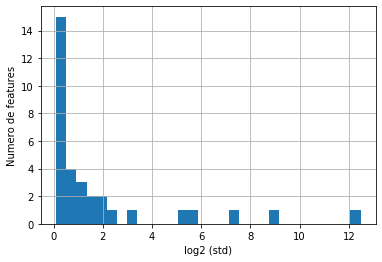

In [15]:
std_old = Xtmp_num.apply(np.std)

std_new = dfXtmp_numeric_transformed.apply(np.std)

print(std_new.head(5))

ax = std_old.apply(lambda x: np.log2(x+1)).hist(bins = 30)
ax.set_xlabel('log2 (std)')
ax.set_ylabel('Numero de features')


#### preguntas:
* Qué significan esos valores negativos? 
* Que consecuencias puede traer que haya variables con tanta diferencia en su escala?

# Ya sabemos preprocesar variables categóricas, y variables numéricas

##### Ahora vamos a hacer un único preprocesamiento que unifique todo lo que vimos:

* nos vamo a valer de ColumnTransformer, que nos permite hacer distintas operaciones sobre distintos grupos de feautres

In [16]:
## estas 3 líneas ya fueron corrias antes
#categorical_feature_mask = X_train.dtypes==object       # esto nos da un vector booleano 
#categorical_columns = X_train.columns[categorical_feature_mask].tolist()  # acá picnhamos los nombres de esas columnas
#numerical_columns = X_train.columns[~X_train.columns.isin(categorical_columns)] # defino las numéricas como el complemento de las categóricas 

preprocessor = ColumnTransformer(transformers = [
    ('num', numeric_transformer,numerical_columns),
    ('cat', categorical_transformer,categorical_columns)
])

X_train_both_tranformations = preprocessor.fit_transform(X_train)



##### Pensalo un segundo, hiciste algo Súper potente: definiste dos pipelines (numeric_transformer, y categorical_transformer)
### y luego loss uniste en un único proceso!! 
Tenemos nuestro 'preprocessor', que vamos a concatenar luego con distintos modelos de M.Learning


In [17]:
transf = preprocessor.transformers_

numeric_names = preprocessor.transformers_[0][2].tolist()
categorical_output_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names().tolist()

cols = numeric_names + categorical_output_names  # ver nota abajo


#### ColumnTransformer 
* va concatenando las columnas que procesa en el orden que nosotros hayamos definido los stetps. 
#### Hay que ser muy cuidadoso de no pifiarle en estas cosas y entender bien la forma en que está trabajando nuestro pipeline
##### Veamosslo

In [18]:
pd.DataFrame(X_train_both_tranformations,columns = cols).head()

,gerp_gerp_nr,gerp_gerp_rs,linsight_value,phastcons_phastcons100_vert,phastcons_phastcons30_mamm,phylop_phylop100_vert,phylop_phylop100_vert_r,phylop_phylop30_mamm,segway_sum_score,segway_mean_score,...,x3_S,x3_missing,x4_E,x4_H,x4_K,x4_N,x4_missing,x5_N,x5_Y,x5_missing
0,8.193887,1.730304,23.002452,2.445903,2.529889,1.537029,2.250029,1.378659,1.405368,2.118317,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,7.478064,0.591777,23.002452,0.132079,0.007824,0.594699,1.406437,0.309056,1.405368,2.118317,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8.239578,1.739952,23.002452,2.445903,1.637908,2.103156,2.722514,1.762963,1.405368,2.118317,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,7.874051,1.662764,23.002452,2.445903,2.608133,1.618825,2.318155,1.499594,3.365814,5.495892,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.726946,1.842870,23.002452,2.445903,2.608133,1.298925,2.062820,1.762963,1.405368,2.118317,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# Hahora, vamos a integrar nuestro preprocessor con un modelo súper simple de ML. 

In [19]:
### Construimos el Pipeline
## Regresion Logistica SIN regularización
pipeline = Pipeline(steps = [('preprocessing',preprocessor),
                             ('clasificador',LogisticRegression(penalty = 'none',solver = 'lbfgs'))])

#Entrenamiento
pipeline = pipeline.fit(X_train, y_train)

#Extraemos las predicciones
predictions = pd.Series(pipeline.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


* Y en solo 3 líneas de código ahora, hemos generado un modelo con su proprio preprocesamiento de datos incluido

* Que el preprocesamiento esté inmerso en el modelo, y no se haga por fuera del mismo nos aportará robustez, poder de generalización entre otras ventajas. Además, se podrá meter dentro de nuestros procedimientos de validación cruzada con total prolijidad 

#### Notas para finalizar, sobre preprocesado de datos 
* 1) No imputar ni normalizar los features categóricos como si fueran continuos. 
* Para evitar este fue fundamental nuestra unión de pipelines. 


* 2) Un error general e importante de entender, es evitar aplicar transformaciones globales al dataset antes de hacer el train-test-split (o incluso despues de haberlo hecho) sin incluirlos en el modelo  mismo. 
*  Aplicado una operación global al X_train te lleva a una mala prárctica de validación cruzada (veremos eso luego eso).
* porque conduce a una sobreestimación de la performance en el proceso de validación cruzada. 

* Esos implica que, cuando hagamos validación cruzada, y separemos nuestro dataset en grupos para entrenar y otros para validar, el set con que se entrene va a tener info de la distribución de features  en el evaluation set.


## Ahora exploremos un poco los resultados de este modelo simple que construimos

In [20]:
probas = pd.DataFrame(pipeline.predict_proba(X_test),columns = ['beningn','pathog'])
y_pred = probas['pathog']
probas.head()

,beningn,pathog
0,0.446575,0.553425
1,0.995572,0.004428
2,0.872917,0.127083
3,0.027735,0.972265
4,0.715134,0.284866


## Cómo e distribuyen nuestro score?

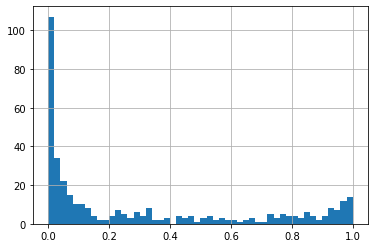

In [21]:
y_pred.hist(bins = 50)

## Cuál es su performance? (AUCs)
* AUC_roc
* AUC_prcision_recall

Text(0.5, 0.98, 'AUC - ROC & Prec-Recall')

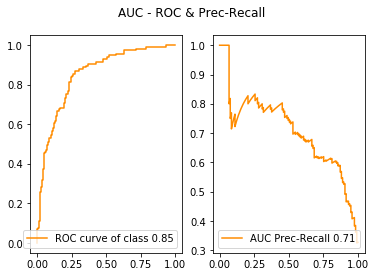

In [22]:
# para plotear
fig, (ax1, ax2) = plt.subplots(1, 2)
matplotlib.rcParams['figure.figsize'] = [8, 4]

## ROC curve
roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
ax1.plot(fpr, tpr, color='darkorange', label="ROC curve of class %.2f"%roc_auc)
ax1.legend(loc="lower right")

## precision recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
aucpr =  metrics.average_precision_score(y_test, y_pred)
ax2.plot(recall, precision, color='darkorange', label="AUC Prec-Recall %.2f"%aucpr)
ax2.legend(loc="lower right")


fig.suptitle('AUC - ROC & Prec-Recall')

## Y donde en qué variables está concentrado el poder predictivo?

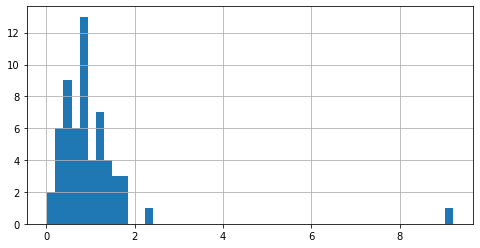

In [23]:
lr = pipeline.named_steps['clasificador']
coefs = pd.Series(2**lr.coef_[0])
coefs.hist(bins =  50)

In [24]:
coefs.index = cols
coefs = coefs.sort_values(ascending=False)
coefs[(coefs > 1.4)|(coefs<0.5)]

phylop_phylop100_vert                             9.201273
x0_Ion transport domain                           2.247288
prec_prec                                         1.772437
x3_S                                              1.754609
x0_Myosin head, motor domain                      1.678875
exac_gene_exac_cnv_score                          1.652596
x4_E                                              1.632797
intact_counts                                     1.623924
gnomad_gene_pRec_max                              1.421127
x4_H                                              1.409725
x0_Aromatic amino acid hydroxylase, C-terminal    1.409348
x5_N                                              0.465701
x1_missing                                        0.463115
x3_missing                                        0.463115
x4_missing                                        0.463115
x2_missing                                        0.463115
x1_E                                              0.4506

### Qué coeficientes son estadísticamente significativos?

### Son robustos estos resultados? 
* El orden relativo de importancia fluctua con las itearaciones? En qué medida?


### Cómo cambia si implementamos el término de regularización? 
* Se puede extraer un p-value y un intervalo de confianza para los coeficientes de c/variable en el caso de usar regularización?
* De qué modo lo deberíamos implementar?

* Que coeficientes sosbreviven al ir aumentando el término de regularización? 
* Esto depende de si usamos L1 o L2?
